# To Explore Unsupervised Machine Learning


In [73]:
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [5]:
iris_df = pd.read_csv('Iris.csv')

In [12]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Checking for Nulls

In [40]:
iris_df.drop('Species',axis=1, inplace = True)

In [63]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [64]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [65]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


### Plotting raw data

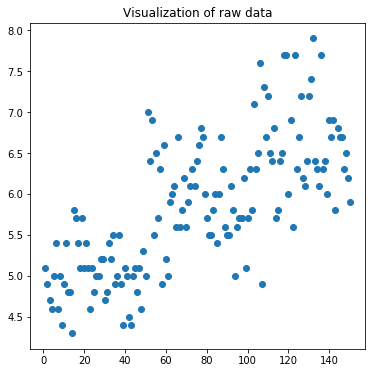

In [146]:
plt.figure(figsize=(6, 6))
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1])
plt.title('Visualization of raw data');

### Vizualizing the data

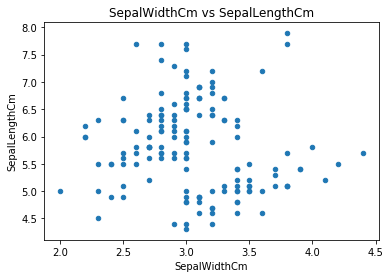

In [171]:
iris_df.plot(kind = 'scatter',x='SepalWidthCm',y='SepalLengthCm',title = 'SepalWidthCm vs SepalLengthCm')

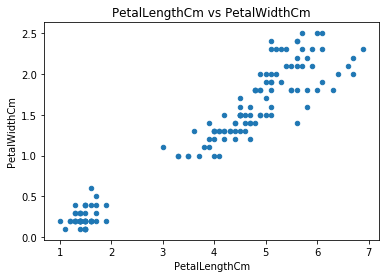

In [172]:
iris_df.plot(kind = 'scatter',x='PetalLengthCm',y='PetalWidthCm',title = 'PetalLengthCm vs PetalWidthCm')


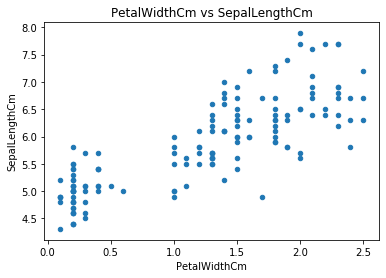

In [173]:
iris_df.plot(kind = 'scatter',x='PetalWidthCm',y='SepalLengthCm',title = 'PetalWidthCm vs SepalLengthCm')


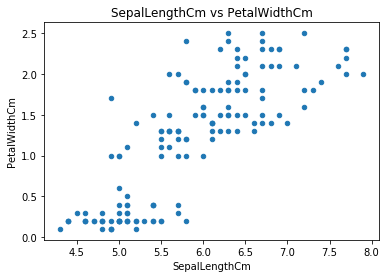

In [174]:

iris_df.plot(kind = 'scatter',x='SepalLengthCm',y='PetalWidthCm',title = 'SepalLengthCm vs PetalWidthCm')


### Elbow method to find optimum nuber of clusters

In [113]:
WSS = []

for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(iris_df)
    WSS.append(sum(np.min(cdist(iris_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / iris_df.shape[0])
    


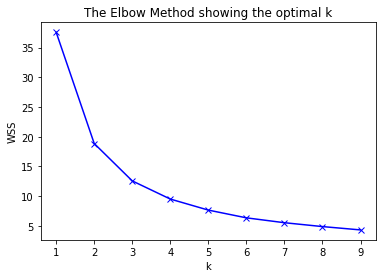

In [115]:
plt.plot(K, WSS, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Fitting the Iris data to Standard Scaler

In [164]:
X_std = StandardScaler().fit_transform(iris_df)

### implementation of kmeans 

In [165]:
km = KMeans(n_clusters=3, max_iter=100)

km.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Plotting the Clustered Data

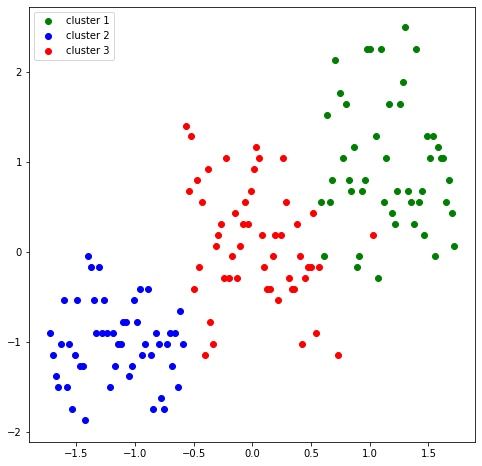

In [161]:

fig, ax = plt.subplots(figsize=(8, 8))

plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')

plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')

plt.scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='red', label='cluster 3')

plt.legend()